![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

Utilize your unsupervised learning skills to clusters in the penguins dataset!

- Import, investigate and pre-process the "penguins.csv" dataset.
- Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

     culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0                39.1             18.7  ...           0         1
1                39.5             17.4  ...           1         0
2                40.3             18.0  ...           1         0
3                36.7             19.3  ...           1         0
4                39.3             20.6  ...           0         1
..                ...              ...  ...         ...       ...
327              47.2             13.7  ...           1         0
328              46.8             14.3  ...           1         0
329              50.4             15.7  ...           0         1
330              45.2             14.8  ...           1         0
331              49.9             16.1  ...           0         1

[332 rows x 6 columns]


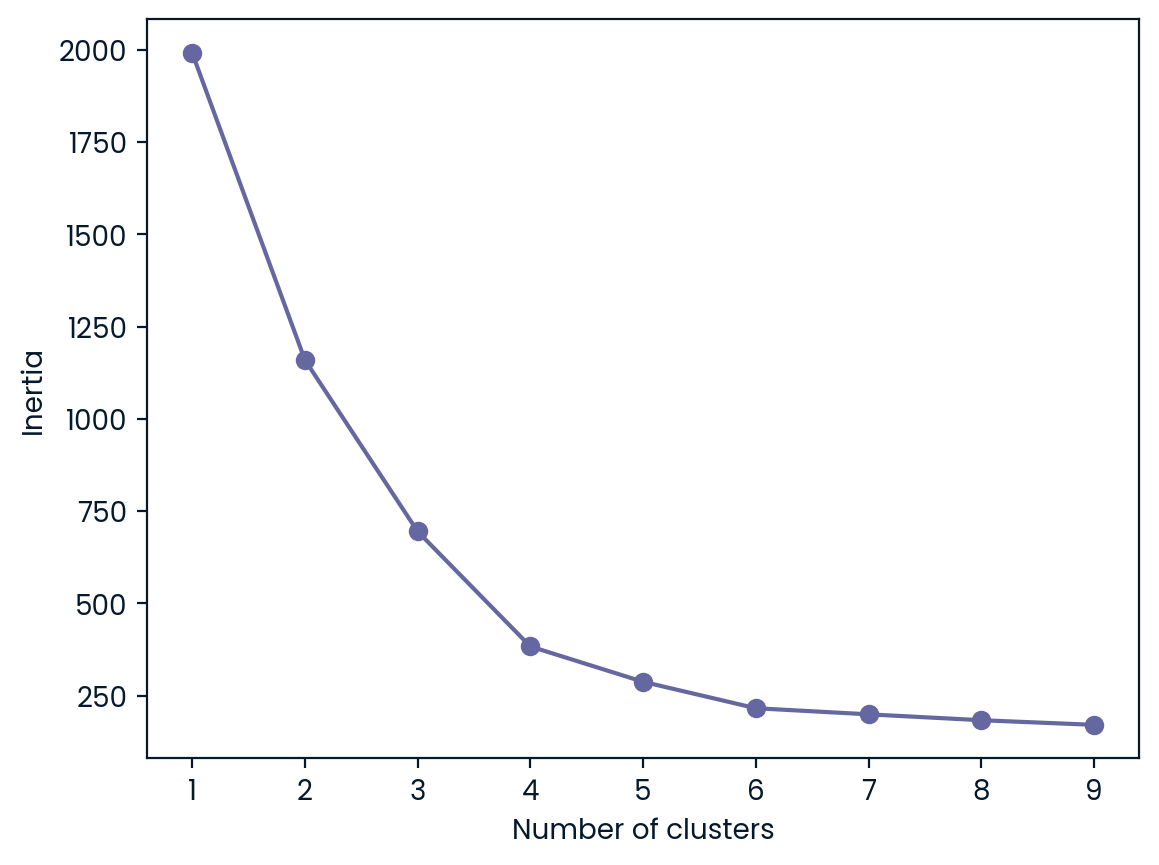

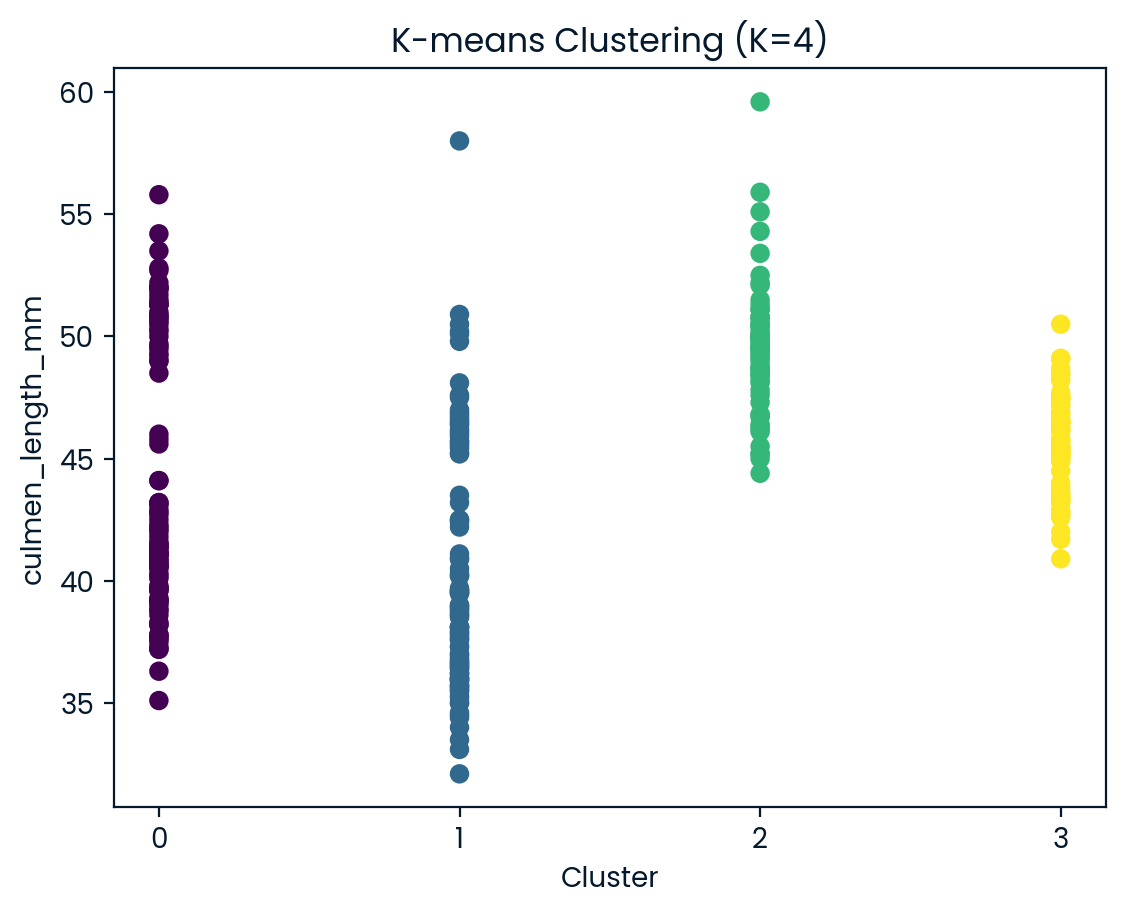

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,49.473770,15.718033,221.540984
3,45.563793,14.237931,212.706897


In [7]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

#get dummies
penguins_df = pd.get_dummies(penguins_df, dtype = 'int')
print(penguins_df)

#Perform preprocessing steps on the dataset - standarizing / scaling
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data = X, columns = penguins_df.columns)

#Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

#Run the K-means clustering algorithm with the optimal number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()


# Step - create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins